In [89]:
# Modues to be used
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import tensorflow as tf

from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior() 

In [3]:
# Load data from pickle files

# -> Player dictionary with the dataFrames
f = open('data/dict_player.pickle', 'rb')
dict_player = pickle.load(f)

# -> Map dataFrames
f = open('data/df_map.pickle','rb')
df_map = pickle.load(f)

# -> Map dictionary
f = open('data/dict_map.pickle','rb')
dict_map = pickle.load(f)

In [4]:
player_id = list(dict_player.keys())[0]

# dict_player[player_id].tail()
df_map.keys()

Index(['map_id', 'map', 'date', 'event_id', 'event_name', 'team_id_1',
       'team_name_1', 'team_score_1', 'team_kills_1', 'team_deaths_1',
       'team_assists_1', 'team_rank_1', 'team_id_2', 'team_name_2',
       'team_score_2', 'team_kills_2', 'team_deaths_2', 'team_assists_2',
       'team_rank_2', 'winner'],
      dtype='object')

# What if we look at linear regression on the win rate?

In [71]:
# First we take all the teams from 2019
df_tmp = df_map[ (df_map['date']>datetime(2019,1,1)) & ( (df_map['team_rank_1']>0) & (df_map['team_rank_2']>0) ) ]

# Get the teams
dict_team = {}
for team_id in df_tmp['team_id_1'].unique():
    dict_team[team_id] = {}
    
    dict_team[team_id]['rating_vec'] = []
    dict_team[team_id]['kast_vec']   = []
    dict_team[team_id]['prize_vec']  = []
    dict_team[team_id]['rd_vec']     = []
    dict_team[team_id]['win_vec']    = []

    # dict_team[team_id]['avg_rating'] = 0.0
    # dict_team[team_id]['avg_kast']   = 0.0
    # dict_team[team_id]['prize']      = 0.0
    # dict_team[team_id]['avg_rd']     = 0.0
    # dict_team[team_id]['win_rate']   = 0.0

for team_id in df_tmp['team_id_2'].unique():
    try:
        dict_team[team_id]['rating_vec'] = []
        dict_team[team_id]['kast_vec']   = []
        dict_team[team_id]['prize_vec']  = []
        dict_team[team_id]['rd_vec']     = []
        dict_team[team_id]['win_vec']    = []
    except:
        dict_team[team_id] = {}
        dict_team[team_id]['rating_vec'] = []
        dict_team[team_id]['kast_vec']   = []
        dict_team[team_id]['prize_vec']  = []
        dict_team[team_id]['rd_vec']     = []
        dict_team[team_id]['win_vec']    = []

# Loop through all the maps
for map_id in df_tmp.index[:]:

    for team_id in dict_map[map_id]:

        dict_team[team_id]['win_vec'].append( 
            dict_map[map_id][team_id]['win'] )

        for player_id in dict_map[map_id][team_id]['players_id']:
            
            dict_team[team_id]['rating_vec'].append( 
                dict_player[player_id].at[map_id,'rating']
            )

            dict_team[team_id]['kast_vec'].append( 
                dict_player[player_id].at[map_id,'KAST']
            )

            #print(player_id)
        #print(team_id)

# for player_id in dict_player:
#     for map_id in dict_player[player_id].index:        
#         team_id = dict_player[player_id].loc[map_id]['team_id']
        #dict_team[]

#     team_id_1 = df_tmp.loc[map_id]['team_id_1']

In [72]:
dict_team[6665]

{'rating_vec': [1.82,
  1.53,
  1.47,
  1.37,
  1.05,
  1.57,
  1.38,
  1.17,
  1.07,
  0.88,
  2.01,
  1.73,
  1.56,
  1.35,
  1.14,
  1.3,
  1.26,
  1.19,
  0.97,
  0.75,
  1.91,
  1.68,
  1.41,
  1.19,
  1.04,
  1.14,
  0.98,
  0.9,
  0.86,
  0.63,
  1.07,
  0.89,
  0.88,
  0.71,
  0.7,
  2.05,
  1.29,
  1.12,
  1.02,
  0.94,
  2.17,
  1.98,
  1.63,
  1.6,
  0.92,
  1.18,
  1.05,
  0.89,
  0.86,
  0.85,
  1.37,
  1.37,
  1.07,
  1.03,
  1.01,
  1.96,
  1.69,
  1.61,
  1.5,
  1.11,
  1.94,
  1.78,
  1.66,
  1.46,
  1.05,
  1.26,
  1.17,
  1.12,
  1.02,
  0.76,
  1.37,
  1.21,
  1.2,
  0.96,
  0.85,
  1.52,
  1.49,
  1.39,
  1.16,
  0.67,
  1.52,
  1.21,
  1.14,
  1.14,
  0.81,
  1.89,
  1.8,
  1.51,
  1.37,
  1.22,
  1.5,
  1.43,
  1.29,
  1.29,
  1.14,
  1.65,
  1.64,
  1.38,
  1.29,
  1.16,
  1.54,
  1.05,
  1.04,
  0.76,
  0.75,
  1.61,
  1.1,
  1.04,
  0.87,
  0.69,
  1.49,
  1.39,
  1.31,
  1.14,
  1.01,
  2.16,
  2.0,
  1.61,
  1.26,
  0.76,
  1.36,
  1.2,
  0.93,
  0.91,
  0.5

In [118]:
min_num_maps = 10
dict_for_df = {}
for team_id in dict_team:
    n_maps = len( dict_team[team_id]['win_vec'] )
    if n_maps >= min_num_maps:
        dict_for_df[team_id] = {}
        dict_for_df[team_id]['avg_rating'] = np.average( dict_team[team_id]['rating_vec'] )
        dict_for_df[team_id]['avg_kast']   = np.average( dict_team[team_id]['kast_vec'] )
        dict_for_df[team_id]['win_rate']   = np.average( dict_team[team_id]['win_vec'] ) 

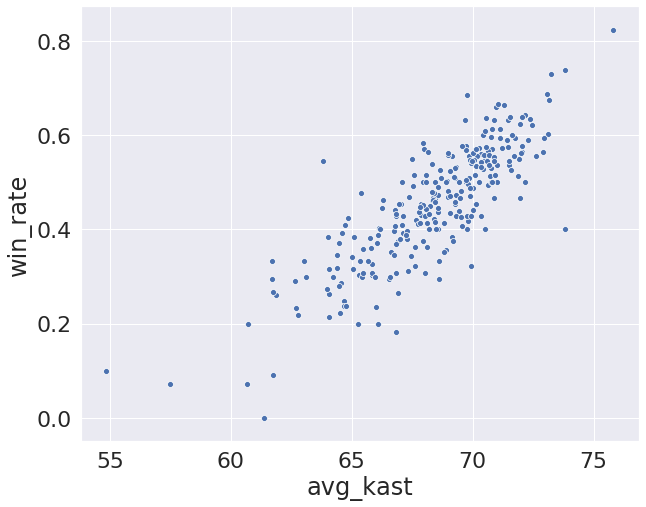

In [120]:
dict_for_df[6665]

df = pd.DataFrame.from_dict( dict_for_df, orient='index' )


sns.set_style("whitegrid")
sns.set(font_scale=2)

plt.figure(figsize=(10,8));

sns.scatterplot(data=df,x='avg_kast',y='win_rate');

[[0.42028986]
 [0.6       ]
 [0.5125    ]
 [0.34482759]
 [0.52727273]
 [0.61403509]
 [0.67375887]
 [0.47368421]
 [0.66037736]
 [0.4137931 ]
 [0.39597315]
 [0.64367816]
 [0.48076923]
 [0.57062147]
 [0.35714286]
 [0.3592233 ]
 [0.57763975]
 [0.50909091]
 [0.44927536]
 [0.55944056]
 [0.61363636]
 [0.55652174]
 [0.53472222]
 [0.39285714]
 [0.44      ]
 [0.49480969]
 [0.29411765]
 [0.09090909]
 [0.57194245]
 [0.4691358 ]
 [0.66486486]
 [0.5326087 ]
 [0.24770642]
 [0.56725146]
 [0.34117647]
 [0.51492537]
 [0.57342657]
 [0.5399061 ]
 [0.26086957]
 [0.54822335]
 [0.45320197]
 [0.7388535 ]
 [0.68636364]
 [0.5678392 ]
 [0.50867052]
 [0.42307692]
 [0.40983607]
 [0.5       ]
 [0.48062016]
 [0.72881356]
 [0.49586777]
 [0.60240964]
 [0.6350365 ]
 [0.63286713]
 [0.45454545]
 [0.6329588 ]
 [0.22222222]
 [0.52941176]
 [0.39285714]
 [0.51587302]
 [0.35135135]
 [0.32758621]
 [0.63924051]
 [0.23404255]
 [0.47058824]
 [0.55284553]
 [0.53623188]
 [0.49180328]
 [0.425     ]
 [0.46448087]
 [0.46280992]
 [0.54

In [126]:
np.shape(X_train)

(202, 2)

In [138]:

# Use only one feature
# X = np.transpose( np.column_stack( df['avg_rating'].values) )
# Y = np.transpose( np.column_stack( df['win_rate'].values) )

X_train, X_test, y_train, y_test = train_test_split(df.drop(['win_rate'],axis=1),df['win_rate'], test_size=0.25)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

#y_pred = y_pred*0

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2e'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test[:,0], y_test,  color='black')
plt.plot(X_test[:,0], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Coefficients: 
 [ 2.02259103 -0.01113669]
Mean squared error: 3.52e-03
Coefficient of determination: 0.76


TypeError: '(slice(None, None, None), 0)' is an invalid key

In [20]:
DAYS_WEIGHT = 365

time_1 = datetime.now()

year_start = 2019

df_tmp = df_map[ (df_map['date']>datetime(2019,1,1)) ]


dict_train = {}

print( len( df_tmp['map_id']) )

for map_id in df_tmp['map_id'][:500]:

    map_date = df_tmp.loc[map_id]['date']

    dict_train[map_id] = {}
    
    team_1 = df_tmp.loc[map_id]['team_id_1']
    team_2 = df_tmp.loc[map_id]['team_id_2']

    score_1 = df_tmp.loc[map_id]['team_score_1']
    score_2 = df_tmp.loc[map_id]['team_score_2']
    
    # Get the team's prize money
    team_1_money = 0.0
    for player_id in dict_map[map_id][team_1]['players_id']:
        
        df_aux = dict_player[player_id]

        date_vec = (map_date-df_aux['date']).astype('timedelta64[D]')
        df_aux = df_aux[ (date_vec>1) & (date_vec<DAYS_WEIGHT) ]

        team_1_money = team_1_money + sum( df_aux['prize'] )

    team_2_money = 0.0
    for player_id in dict_map[map_id][team_2]['players_id']:
        
        df_aux = dict_player[player_id]

        date_vec = (map_date-df_aux['date']).astype('timedelta64[D]')
        df_aux = df_aux[ (date_vec>1) & (date_vec<DAYS_WEIGHT) ]

        team_2_money = team_2_money + sum( df_aux['prize'] )
    
    if team_1_money > 0.0:
        dict_train[map_id]['money_1'] = np.log( team_1_money )
    else:
        dict_train[map_id]['money_1'] = 0.0

    if team_2_money > 0.0:
        dict_train[map_id]['money_2'] = np.log( team_2_money )
    else:
        dict_train[map_id]['money_2'] = 0.0

    winner = df_tmp.loc[map_id]['winner']

    if team_1_money > team_2_money:
        if winner == 1:
            dict_train[map_id]['fav_win'] = 1
        else:
            dict_train[map_id]['fav_win'] = 0
    else:
        if winner == 2:
            dict_train[map_id]['fav_win'] = 1
        else:
            dict_train[map_id]['fav_win'] = 0
    

time_2 = datetime.now()

print( time_2-time_1 )
#date_vec

15446
0:00:11.705926


In [28]:
df = pd.DataFrame.from_dict(dict_train,orient='index')
df.head()
df['fav_win'].mean()

0.62

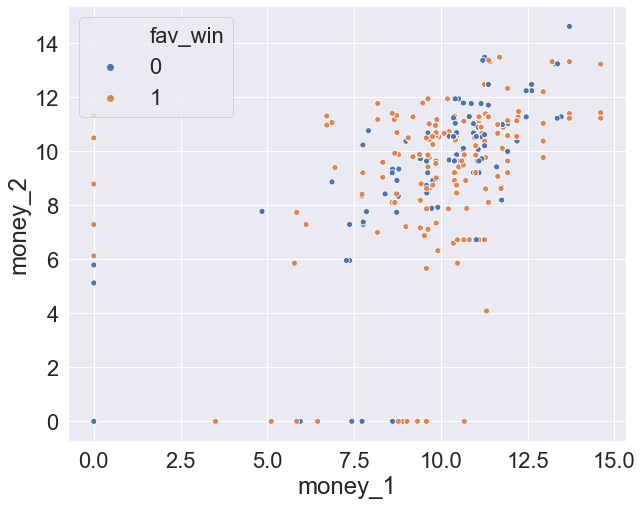

In [27]:
sns.set_style("whitegrid")
sns.set(font_scale=2)

plt.figure(figsize=(10,8));

sns.scatterplot(data=df,x='money_1',y='money_2',hue='fav_win');